In [1]:
!pip install finance_datareader


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import FinanceDataReader as fdr



## 0. 기본데이터 셋

In [179]:
# 동적으로 구성, 월별 종가만 모아두기
s1_ticker = '271560'
s2_ticker = '005380'
s3_ticker = '004370'
s1 = fdr.DataReader(s1_ticker, '2020').resample(rule = 'MS').mean().astype(int)[['Close']].rename(columns = {'Close':s1_ticker})
s2 = fdr.DataReader(s2_ticker, '2020').resample(rule = 'MS').mean().astype(int)[['Close']].rename(columns = {'Close':s2_ticker})
s3 = fdr.DataReader(s3_ticker, '2020').resample(rule = 'MS').mean().astype(int)[['Close']].rename(columns = {'Close':s3_ticker})
stocks = pd.concat([s1, s2, s3], axis = 1)
stocks.head()  # 각 주식들의 종가가 들어 있다.

,271560,005380,004370
Date,,,
2020-01-01,108175,119625,227600
2020-02-01,104820,128025,256975
2020-03-01,100863,90854,263568
2020-04-01,118050,93315,294275
2020-05-01,129710,94852,314342


<AxesSubplot: xlabel='Date'>

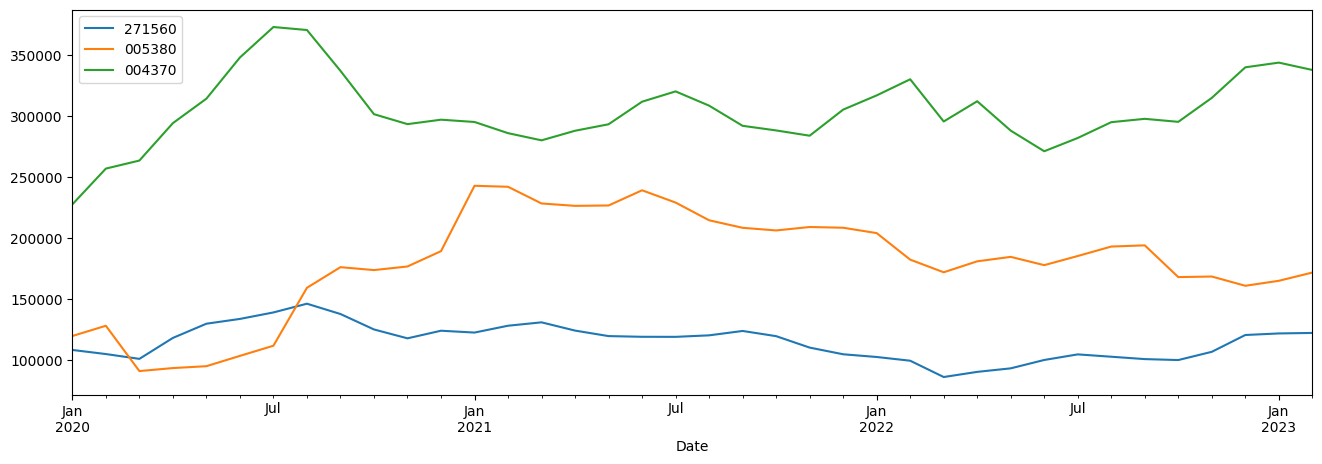

In [9]:
stocks.plot(figsize = (16, 5)) # 이상태는 시작점도 달라서 비교가 힘들다.

In [22]:
# 최고점
print('최고점:', stocks.idxmax(axis = 0))
# 최고가격
print('최고가격:', stocks.max(axis = 0))
# 최저점
print('최저점:', stocks.idxmin(axis = 0))
# 최저가격
print('최저가격:', stocks.min(axis = 0))

최고점: 271560   2020-08-01
005380   2021-01-01
004370   2020-07-01
dtype: datetime64[ns]
최고가격: 271560    146125
005380    242875
004370    373130
dtype: int32
최저점: 271560   2022-03-01
005380   2020-03-01
004370   2020-01-01
dtype: datetime64[ns]
최저가격: 271560     85971
005380     90854
004370    227600
dtype: int32


In [ ]:
# 가격들의 분포도를 해야한다 -> 히스토그램

In [31]:
stocks.shape

(38, 3)

### reset_index, melt

In [180]:
melt_stocks = stocks.reset_index().melt(id_vars = ['Date']) # 271560(농심) 의 가치는 108715
melt_stocks

,Date,variable,value
0,2020-01-01,271560,108175
1,2020-02-01,271560,104820
2,2020-03-01,271560,100863
3,2020-04-01,271560,118050
4,2020-05-01,271560,129710
...,...,...,...
109,2022-10-01,004370,295342
110,2022-11-01,004370,315000
111,2022-12-01,004370,340071
112,2023-01-01,004370,343925


<AxesSubplot: xlabel='variable', ylabel='value'>

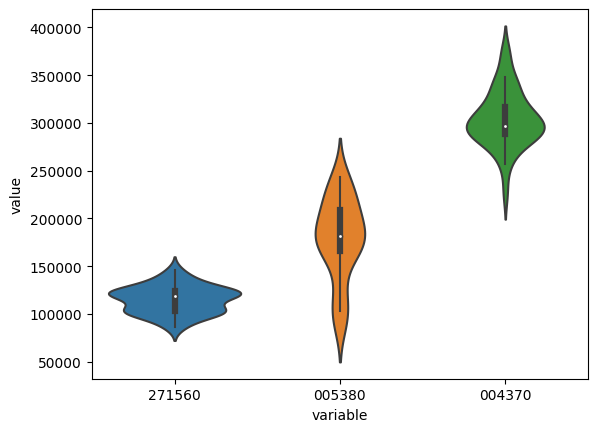

In [26]:
import seaborn as sns
sns.violinplot(data = melt_stocks, x='variable', y='value')

<AxesSubplot: ylabel='Frequency'>

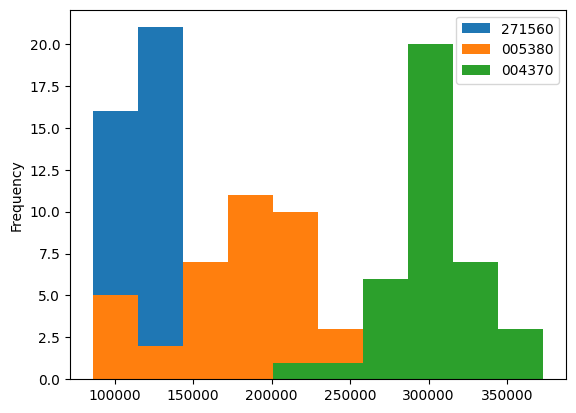

In [32]:
stocks.plot.hist()

# 정규화

In [37]:
normalization = stocks / stocks.iloc[0] * 100
# 시작점 대비 얼마만큼 변경되었느냐를 표시
normalization.head()

,271560,005380,004370
Date,,,
2020-01-01,100.000000,100.000000,100.000000
2020-02-01,96.898544,107.021944,112.906415
2020-03-01,93.240582,75.949007,115.803163
2020-04-01,109.128727,78.006270,129.294815
2020-05-01,119.907557,79.291118,138.111599


<AxesSubplot: xlabel='Date'>

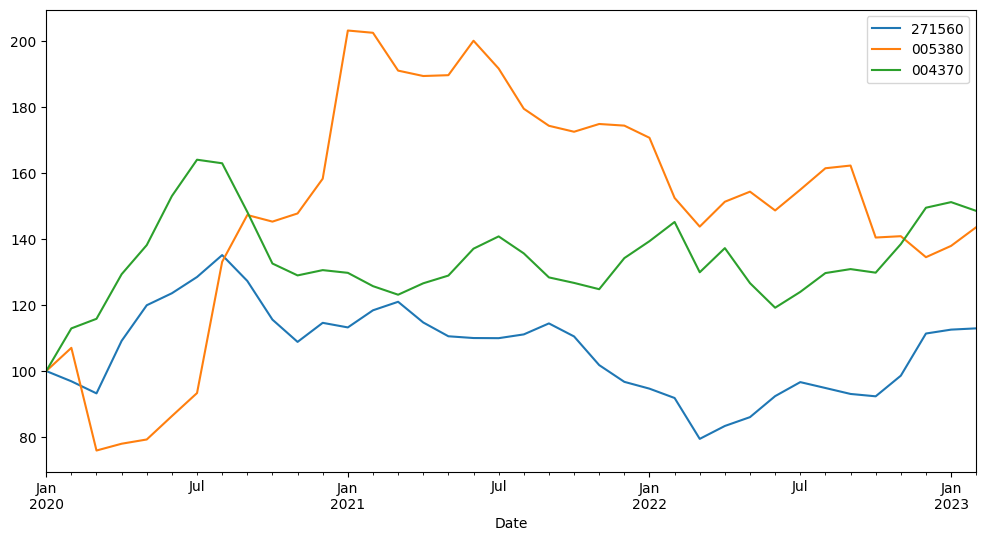

In [40]:
normalization.plot(figsize = (12, 6)) # 서로비교가 잘된다

로그 수익률을 왜 구하는 것일까?

100 -> 130 -> 100 일때  30 % 떨여졌다고 할수 있는가 ? 즉 원본으로 돌이키는데 같은 %를 적용하지 않기 때문.

In [42]:
# 로그 수익률 시각화
log_close = np.log(stocks)
log_close.head()

,271560,005380,004370
Date,,,
2020-01-01,11.591506,11.692117,12.335345
2020-02-01,11.560000,11.759981,12.456734
2020-03-01,11.521518,11.417009,12.482067
2020-04-01,11.678864,11.443736,12.592270
2020-05-01,11.773056,11.460073,12.658237


<AxesSubplot: xlabel='Date'>

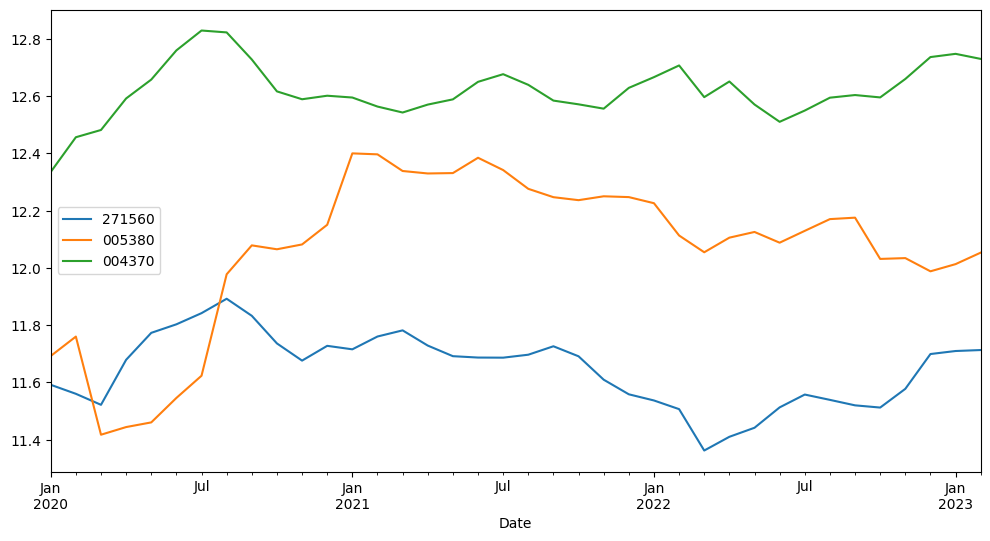

In [43]:
log_close.plot(figsize = (12, 6))

수익률, 각 해당시점의 수익률

In [48]:
# 수익률 , 각 해당시점의 수익률
returns = stocks.pct_change() * 100
returns.tail()

,271560,005380,004370
Date,,,
2022-10-01,-0.769804,-13.429381,-0.825386
2022-11-01,6.760761,0.288186,6.656012
2022-12-01,12.937161,-4.511046,7.959048
2023-01-01,1.061004,2.544254,1.133293
2023-02-01,0.340097,4.100652,-1.755325


<AxesSubplot: ylabel='Frequency'>

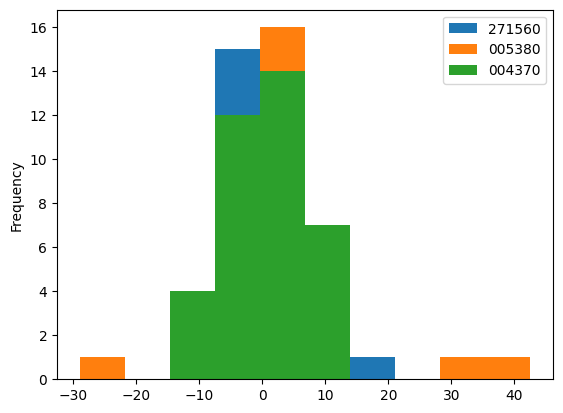

In [49]:
returns.plot.hist()

# 월별수익률

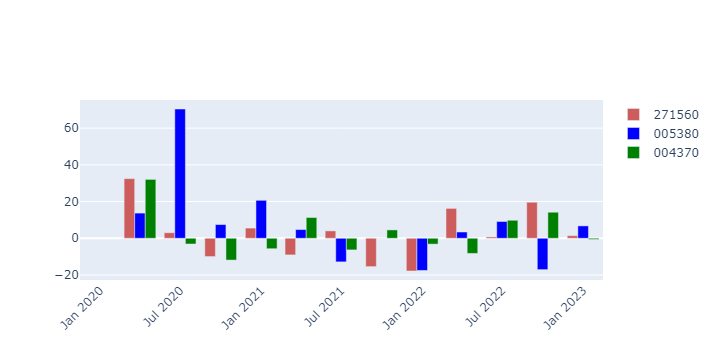

In [82]:
monthly_price = stocks.resample('QS').last()  # 해당월별 종가
monthly_price.head()  # 시간주기도, 시각화가 어떤게 

monthly_return_rate = monthly_price.pct_change() * 100
monthly_return_rate.tail()

# 시각화
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(
    x= monthly_return_rate.index,
    y= monthly_return_rate['271560'],
    name='271560',
    marker_color='indianred'))

fig.add_trace(go.Bar(
    x= monthly_return_rate.index,
    y= monthly_return_rate['005380'],
    name='005380',
    marker_color='blue'))

fig.add_trace(go.Bar(
    x= monthly_return_rate.index,
    y= monthly_return_rate['004370'],
    name='004370',
    marker_color='green'))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

어떤 상황에서 어떤 그래프를 그리는게 종은지 생각할 것. <br>
흐름을 보고싶다. -> lineplot <br>
월별을 보고싶다. -> barplot<br>
분포도를 알고 싶다. -> violingraph<br>

## 일평균수익률, 표준편차, 연평균수익률, 연표준편차, 리스크

In [181]:
일평균수익률 = returns.mean()
일평균수익률

271560    0.506816
005380    1.533344
004370    1.243562
dtype: float64

In [85]:
# 위험도를 살펴볼 때
표준편차 = returns.std()
표준편차

271560     6.093108
005380    10.968356
004370     5.919788
dtype: float64

In [88]:
연평균수익률 = 일평균수익률 * 252
연평균수익률

271560    127.717646
005380    386.402706
004370    313.377734
dtype: float64

In [90]:
연표준편차 = 표준편차 * 252
연표준편차

271560    1535.463271
005380    2764.025668
004370    1491.786562
dtype: float64

In [91]:
return_risk = pd.concat([연평균수익률, 연표준편차], axis = 1)
return_risk.columns = ['Return', 'Risk']
return_risk

,Return,Risk
271560,127.717646,1535.463271
005380,386.402706,2764.025668
004370,313.377734,1491.786562


In [185]:
return_risk = pd.concat([연평균수익률, 연표준편차], axis =1 )
return_risk.columns = ['Return', 'Risk']
return_risk

,Return,Risk
271560,127.717646,1535.463271
005380,386.402706,2764.025668
004370,313.377734,1491.786562


In [186]:
melt_return_risk = return_risk.reset_index().melt(id_vars = 'index')  # melt는 그리기에 편하다.
melt_return_risk

,index,variable,value
0,271560,Return,127.717646
1,005380,Return,386.402706
2,004370,Return,313.377734
3,271560,Risk,1535.463271
4,005380,Risk,2764.025668
5,004370,Risk,1491.786562


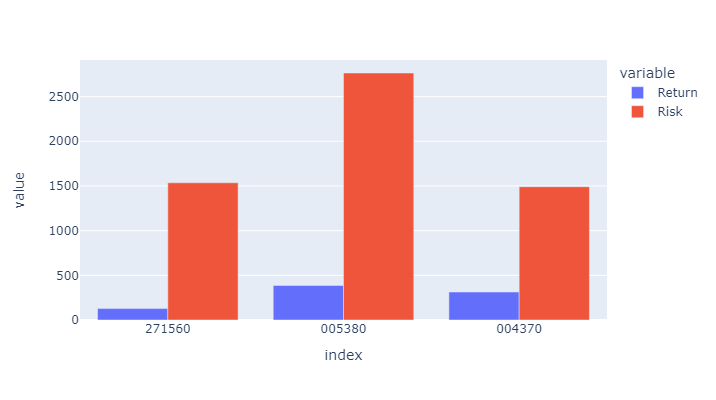

In [104]:
# x = risk, y = Return , 각회사들이 scatter

import plotly.express as px
fig = px.bar(melt_return_risk, x='index', y='value',
             color='variable', barmode='group',
             height=400)
fig.show()

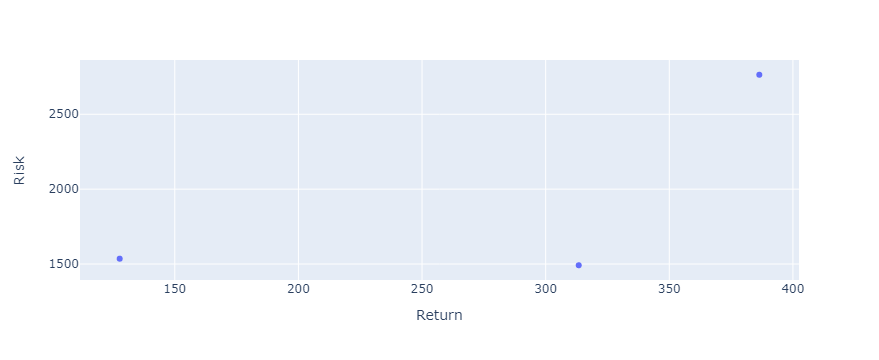

In [188]:
import plotly.express as px
fig = px.scatter(return_risk, x=return_risk['Return'], y=return_risk['Risk'], 
                 hover_data =[return_risk.index])
fig.show()

## 누적수익률

In [114]:
return_rate = returns/100

In [191]:
return_rate.head()

,271560,005380,004370
Date,,,
2020-01-01,NaN,NaN,NaN
2020-02-01,-0.031015,0.070219,0.129064
2020-03-01,-0.037750,-0.290342,0.025656
2020-04-01,0.170399,0.027087,0.116505
2020-05-01,0.098772,0.016471,0.068191


In [195]:
# 누적수익률
cum_returns = (return_rate + 1).cumprod() - 1  # +1 : 100%
cum_returns.tail()

,271560,005380,004370
Date,,,
2022-10-01,-0.076496,0.403946,0.297636
2022-11-01,-0.014061,0.407992,0.384007
2022-12-01,0.113492,0.344476,0.494161
2023-01-01,0.125306,0.378683,0.511094
2023-02-01,0.129133,0.435218,0.484569


<AxesSubplot: xlabel='Date'>

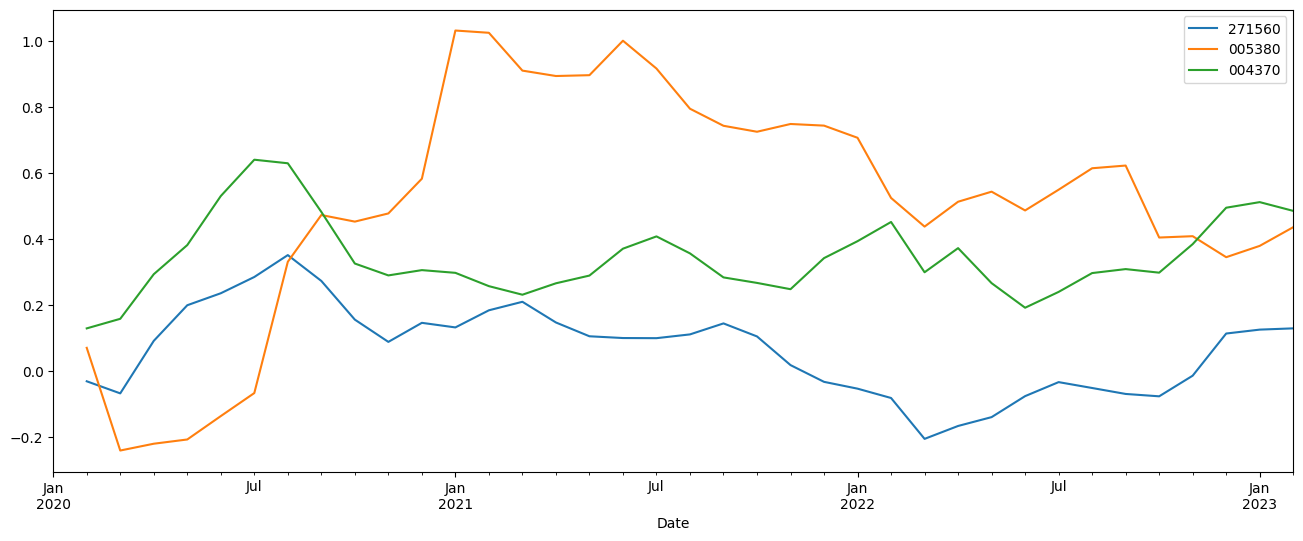

In [196]:
cum_returns.plot(figsize = (16, 6))

In [117]:
return_rate.cov()  # 공분산

,271560,005380,004370
271560,0.003713,0.001106,0.001601
005380,0.001106,0.012030,0.000391
004370,0.001601,0.000391,0.003504


In [123]:
 # 상관계수 -> heatmap ... 찾아서 한번 써볼 것!
return_rate.corr().style.background_gradient(cmap='coolwarm') # Blues 

,271560,005380,004370
271560,1.000000,0.165417,0.443884
005380,0.165417,1.000000,0.060166
004370,0.443884,0.060166,1.000000


해석 : 서로서로 같이 어떻게 움직이는 가 

In [125]:
return_rate.head()

,271560,005380,004370
Date,,,
2020-01-01,NaN,NaN,NaN
2020-02-01,-0.031015,0.070219,0.129064
2020-03-01,-0.037750,-0.290342,0.025656
2020-04-01,0.170399,0.027087,0.116505
2020-05-01,0.098772,0.016471,0.068191


<AxesSubplot: xlabel='271560', ylabel='005380'>

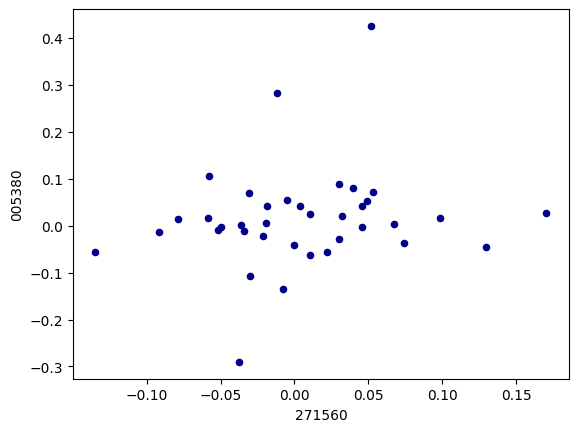

In [127]:
return_rate.plot.scatter(x='271560',
                      y='005380',
                       c='DarkBlue')

<AxesSubplot: xlabel='271560', ylabel='005380'>

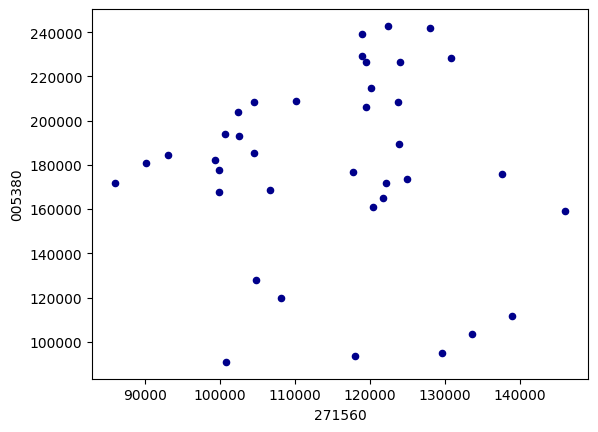

In [128]:
stocks.plot.scatter(x='271560',
                      y='005380',
                       c='DarkBlue')

array([[<AxesSubplot: xlabel='271560', ylabel='271560'>,
        <AxesSubplot: xlabel='005380', ylabel='271560'>,
        <AxesSubplot: xlabel='004370', ylabel='271560'>],
       [<AxesSubplot: xlabel='271560', ylabel='005380'>,
        <AxesSubplot: xlabel='005380', ylabel='005380'>,
        <AxesSubplot: xlabel='004370', ylabel='005380'>],
       [<AxesSubplot: xlabel='271560', ylabel='004370'>,
        <AxesSubplot: xlabel='005380', ylabel='004370'>,
        <AxesSubplot: xlabel='004370', ylabel='004370'>]], dtype=object)

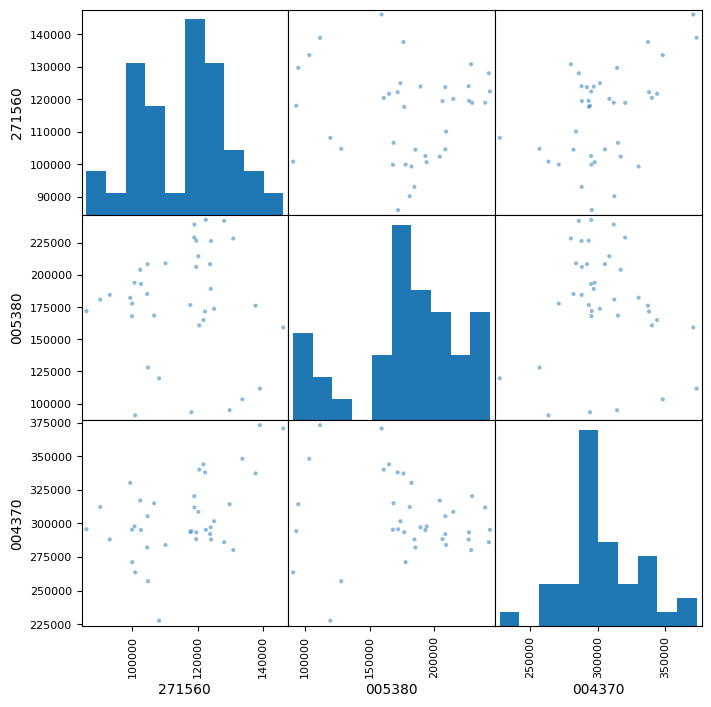

In [197]:
from pandas.plotting import scatter_matrix  # 한번에 보여주기
scatter_matrix(stocks, figsize = (8, 8))

In [153]:
# 이동평균
stocks.rolling(5).mean().dropna().head()

,271560,005380,004370
Date,,,
2020-05-01,112323.6,105334.2,271352.0
2020-06-01,117415.8,102072.8,295454.6
2020-07-01,124243.0,98799.0,318685.6
2020-08-01,133295.4,112463.2,340107.0
2020-09-01,137218.6,129019.2,348690.0


In [149]:
# 지수가중이동평균
stocks.ewm(span = 10).mean().head()

,271560,005380,004370
Date,,,
2020-01-01,108175.000000,119625.000000,227600.000000
2020-02-01,106329.750000,124245.000000,243756.250000
2020-03-01,104132.152824,110822.039867,251720.441860
2020-04-01,108717.463366,105054.250248,265740.272772
2020-05-01,114743.849689,102125.461677,279692.506814


In [198]:
# 이동평균 , 지수가동이동평균
SMA = stocks.rolling(10).mean().dropna()
EWMA = stocks.ewm(100).mean().dropna()
SMA

,271560,005380,004370
Date,,,
2020-10-01,124300.1,125062.5,308749.9
2020-11-01,125254.0,130766.6,315335.1
2020-12-01,127167.2,136887.9,319347.1
2021-01-01,129325.9,152090.0,322512.8
2021-02-01,130326.4,166964.0,321690.8
2021-03-01,130439.4,180315.1,318272.5
2021-04-01,129482.6,192624.2,312263.4
2021-05-01,127542.2,204129.6,304284.6
2021-06-01,124827.4,212130.2,298403.4


<AxesSubplot: title={'center': 'EWMA'}, xlabel='Date'>

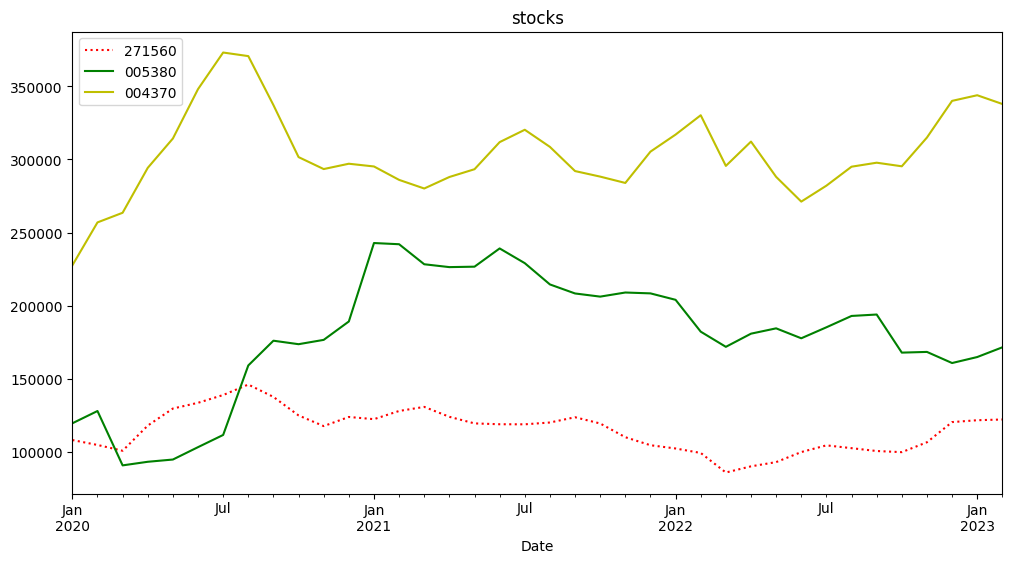

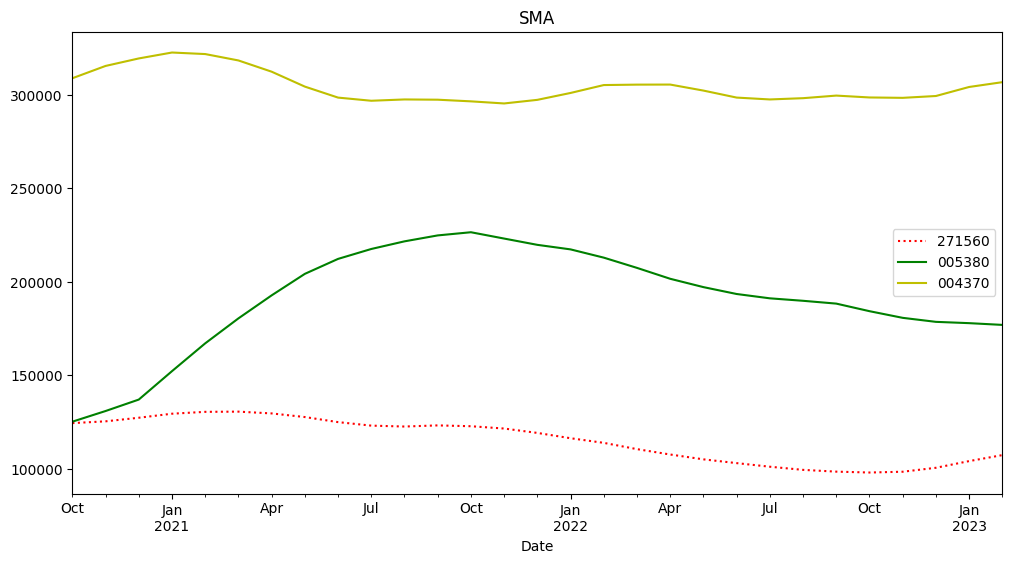

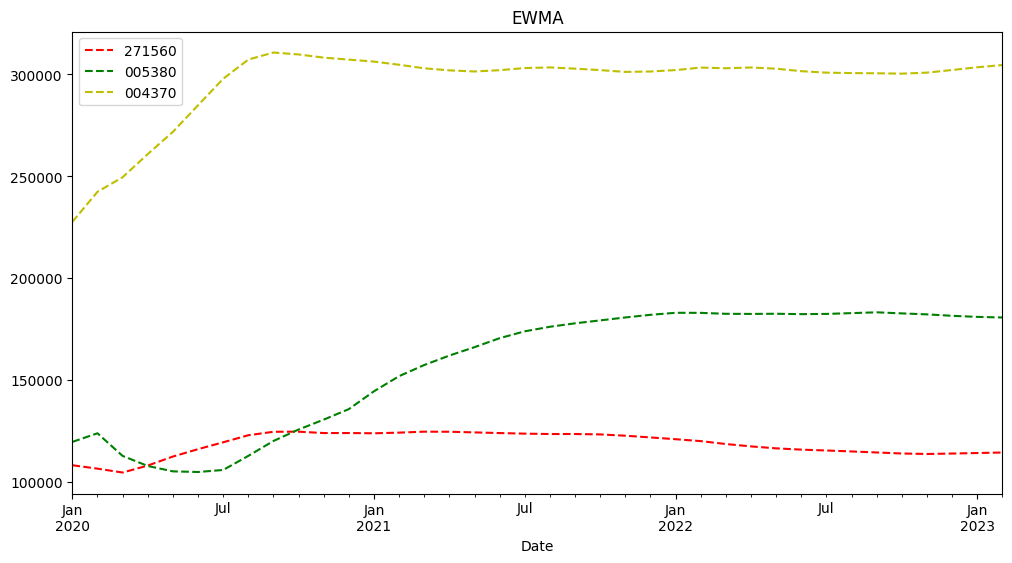

In [204]:
# 시각화
ax = stocks.plot(figsize = (12, 6),title = 'stocks', style = {'271560': ':r', '005380': 'g', '004370':'y'})
SMA.plot(figsize = (12, 6), title = 'SMA',  style = {'271560': ':r', '005380': 'g', '004370':'y'})
EWMA.plot(figsize = (12, 6),  title = 'EWMA', style = {'271560': '--r', '005380': '--g', '004370':'--y'})

## 실습

In [159]:
KOSPI = fdr.DataReader('KS11', '2016')[['Close']].rename(columns = {'Close':'KOSPI'})
NASDAQ = fdr.DataReader('IXIC', '2016')[['Close']].rename(columns = {'Close':'NASDAQ'})
SnP500 = fdr.DataReader('US500', '2016')[['Close']].rename(columns = {'Close':'SnP500'})
GOLD = fdr.DataReader('ZG', '2016')[['Close']].rename(columns = {'Close':'Gold'}) # 금선물
BTC = fdr.DataReader('BTC/KRW', '2016')[['Close']].rename(columns = {'Close':'BTC/KRW'}) # 비트코인

In [160]:
# 평균 수익률, 리스크 비교
# 지수별 상관관계 비교 & 시각화
# 가격, 수익률 분포 확인
# 월별 수익률 분포 확인

In [ ]:
# 평균 수익률, 리스크 비교

In [169]:
KOSPI = KOSPI.resample(rule = 'YS').mean()
NASDAQ = NASDAQ.resample(rule = 'YS').mean()
SnP500 = SnP500.resample(rule = 'YS').mean()
GOLD = GOLD.resample(rule = 'YS').mean()
BTC = BTC.resample(rule = 'YS').mean()

In [174]:
KOSPI_yearly_return_rate = KOSPI.pct_change() * 100
NASDAQ_yearly_return_rate = NASDAQ.pct_change() * 100
SnP500_yearly_return_rate = SnP500.pct_change() * 100
GOLD_yearly_return_rate = GOLD.pct_change() * 100
BTC_yearly_return_rate = BTC.pct_change() * 100

In [177]:
stocks = pd.concat([KOSPI_yearly_return_rate, NASDAQ_yearly_return_rate, SnP500_yearly_return_rate, GOLD_yearly_return_rate, BTC_yearly_return_rate ], axis = 1)
stocks

,KOSPI,NASDAQ,SnP500,Gold,BTC/KRW
Date,,,,,
2016-01-01,NaN,NaN,NaN,NaN,NaN
2017-01-01,16.274013,25.011182,16.920483,32.128393,576.756418
2018-01-01,0.633709,19.095458,12.132648,18.836308,86.005908
2019-01-01,-9.417418,6.923976,6.086277,-20.861946,4.801971
2020-01-01,5.413653,28.480355,10.451844,89.589197,49.289692
2021-01-01,40.140646,40.877845,32.802271,56.659811,320.048965
2022-01-01,-19.003423,-14.892598,-4.092092,-64.470480,-34.184962
2023-01-01,-5.002386,-7.812008,-2.217644,3.514059,-27.103239


In [ ]:
normalization = stocks / stocks.iloc[0] * 100
# 시작점 대비 얼마만큼 변경되었느냐를 표시
normalization.head()